In [1]:
import os
print(os.getcwd())

C:\Users\User\Jupyter Notebook Files\Python for data analytics 2\Feb


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column', None)

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\SEM 4 Academic Datasets\insurance - insurance.csv")

In [4]:
df = df.drop('id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Sex, Smokers, and Region

C:\Users\User\AppData\Local\Temp\ipykernel_35892\2356298614.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='dark')


<Axes: xlabel='sex', ylabel='count'>

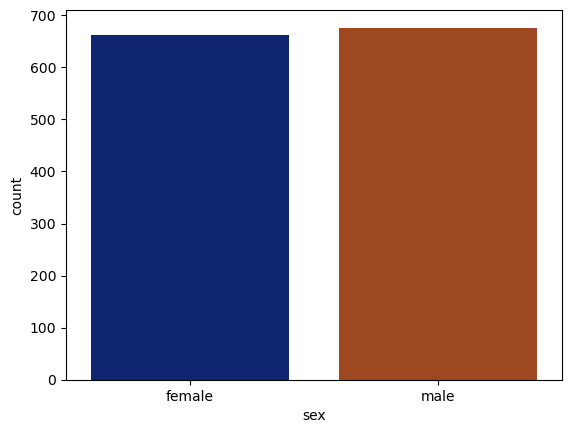

In [5]:
sns.countplot(data=df, x='sex', palette='dark')

C:\Users\User\AppData\Local\Temp\ipykernel_35892\3073032136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoker', palette='bright')


<Axes: xlabel='smoker', ylabel='count'>

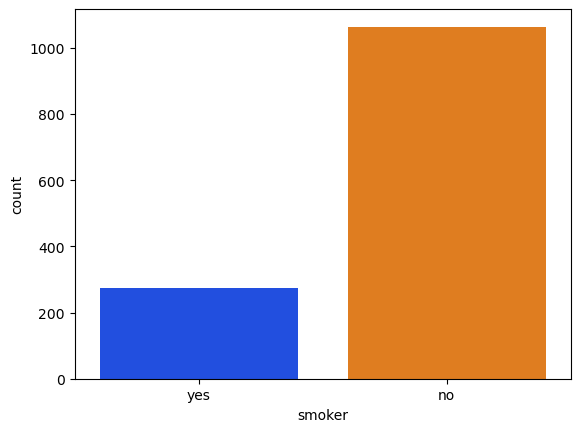

In [6]:
sns.countplot(data=df, x='smoker', palette='bright')

C:\Users\User\AppData\Local\Temp\ipykernel_35892\1628805309.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', palette='deep')


<Axes: xlabel='region', ylabel='count'>

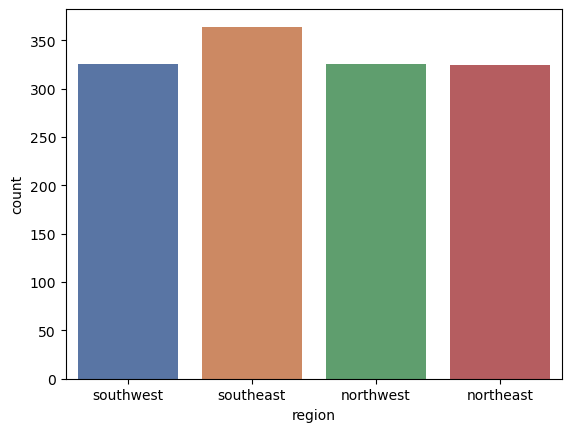

In [7]:
sns.countplot(data=df, x='region', palette='deep')

<Axes: xlabel='age', ylabel='Count'>

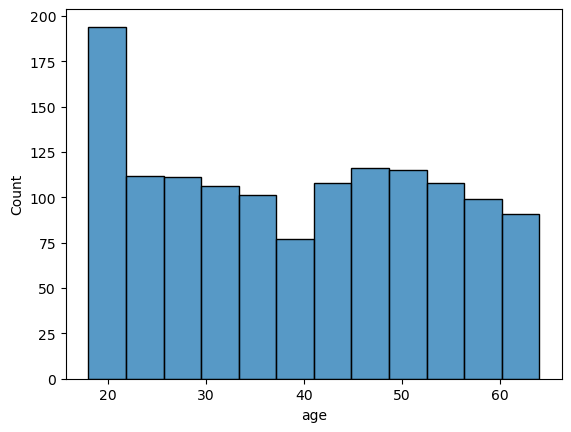

In [9]:
sns.histplot(df['age'])

<Axes: ylabel='age'>

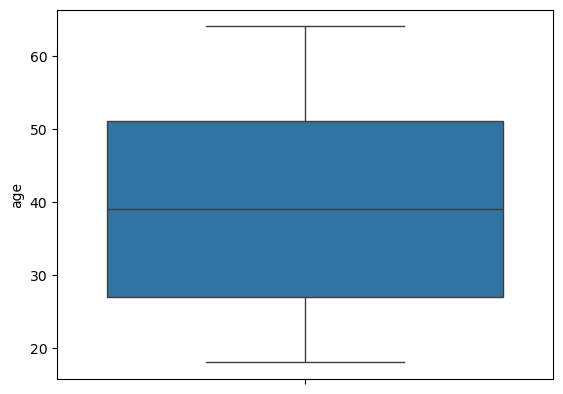

In [10]:
sns.boxplot(df['age'])

## Pair Plot hue Sex

In [11]:
pp1 = df.loc[:, ['age', 'bmi', 'children', 'charges', 'sex']]
pp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   sex       1338 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


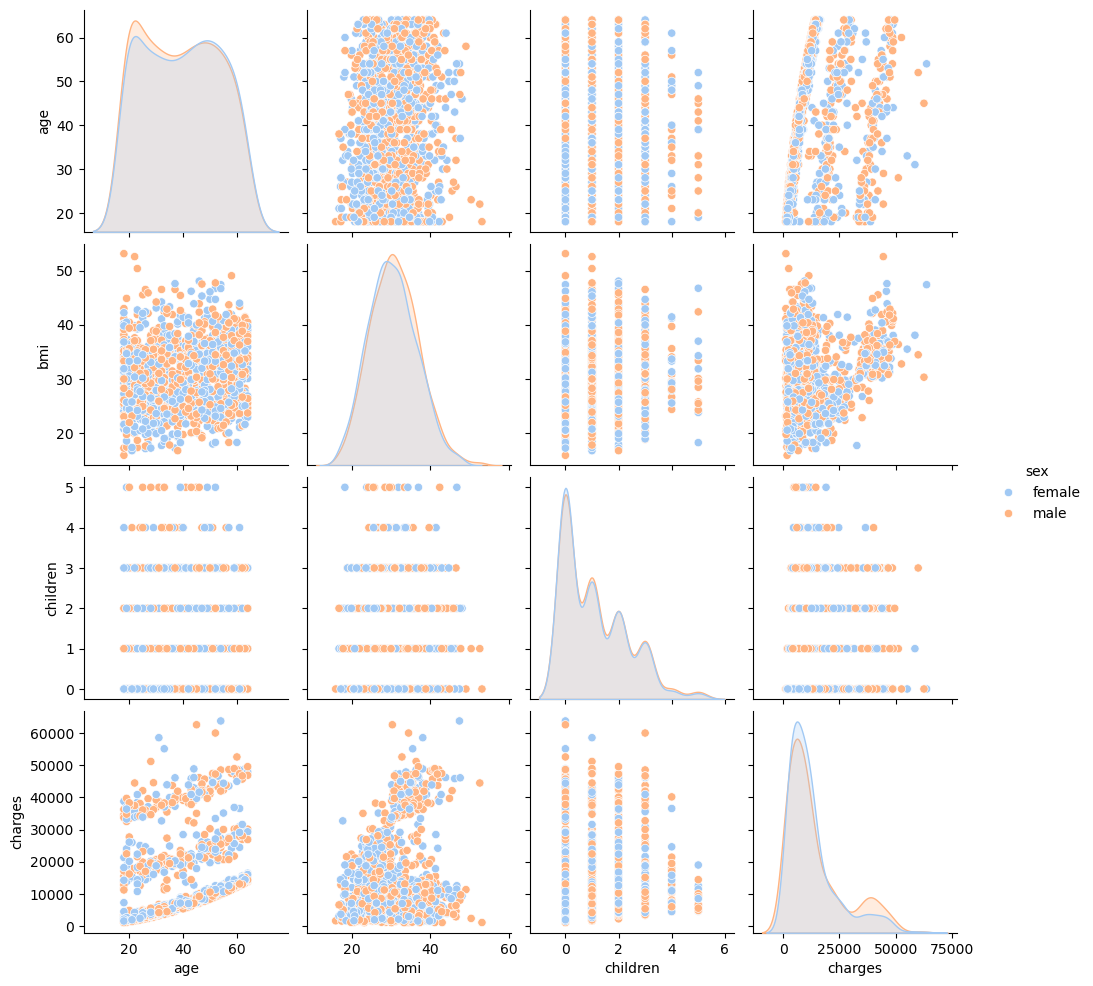

In [12]:
sns.pairplot(pp1, hue='sex', palette='pastel')

In [13]:
pp2 = df.loc[:, ['age', 'bmi', 'children', 'charges', 'smoker']]
pp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   smoker    1338 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


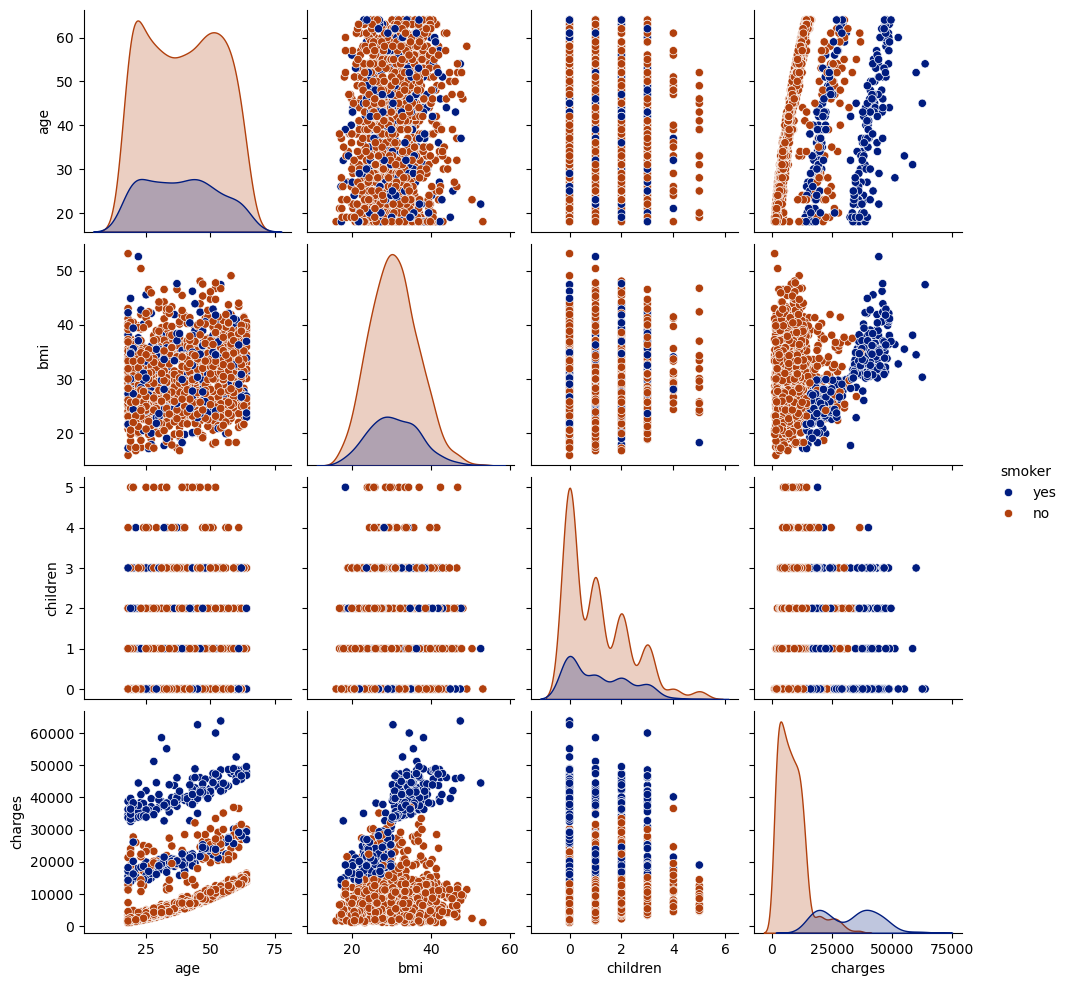

In [14]:
sns.pairplot(pp2, hue='smoker', palette='dark')

In [15]:
pp3 = df.loc[:, ['age', 'bmi', 'children', 'charges', 'region']]
pp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   region    1338 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


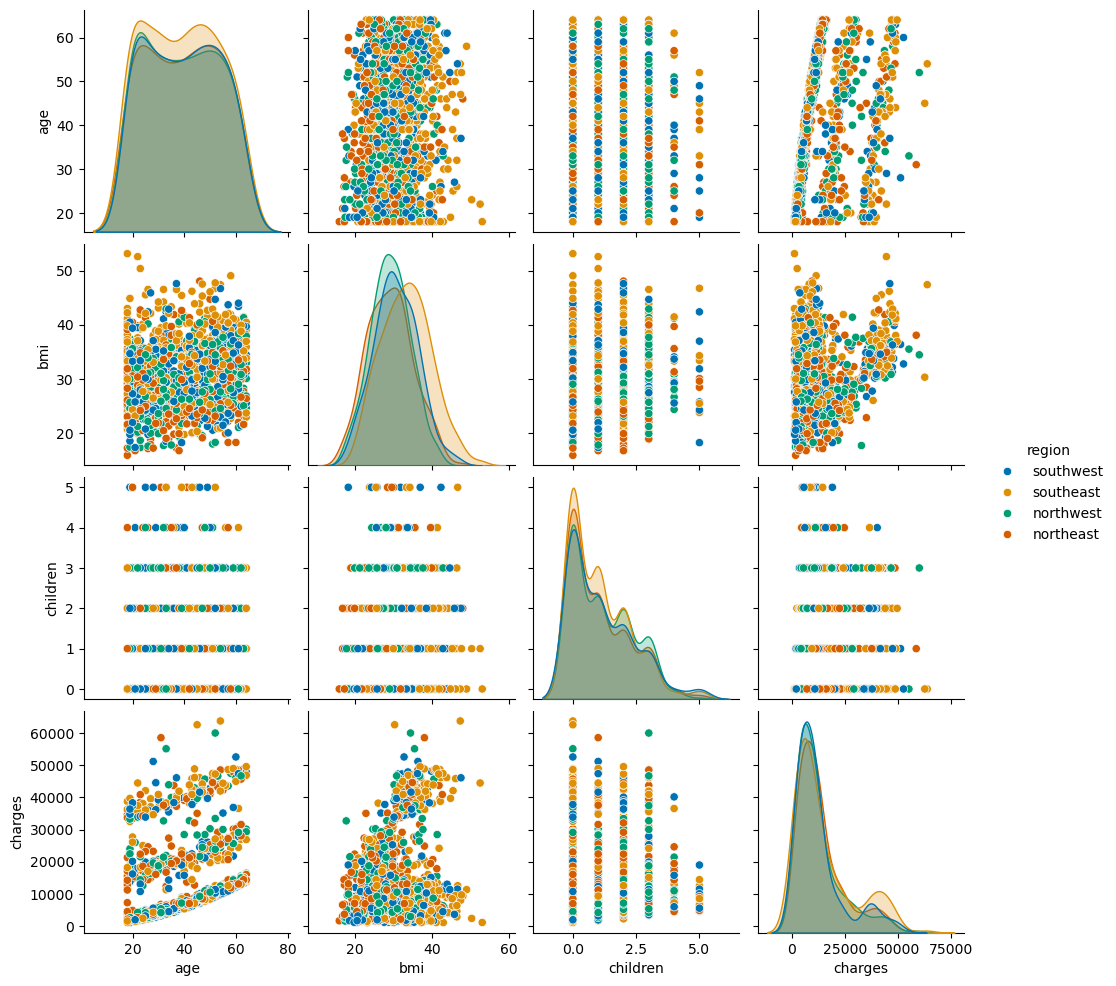

In [16]:
sns.pairplot(pp3, hue='region', palette='colorblind')

## Selecting continuous variables for seeing correlation

In [17]:
hm = df.loc[:, ['age', 'bmi', 'children', 'charges']]
hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


## Pair Plots

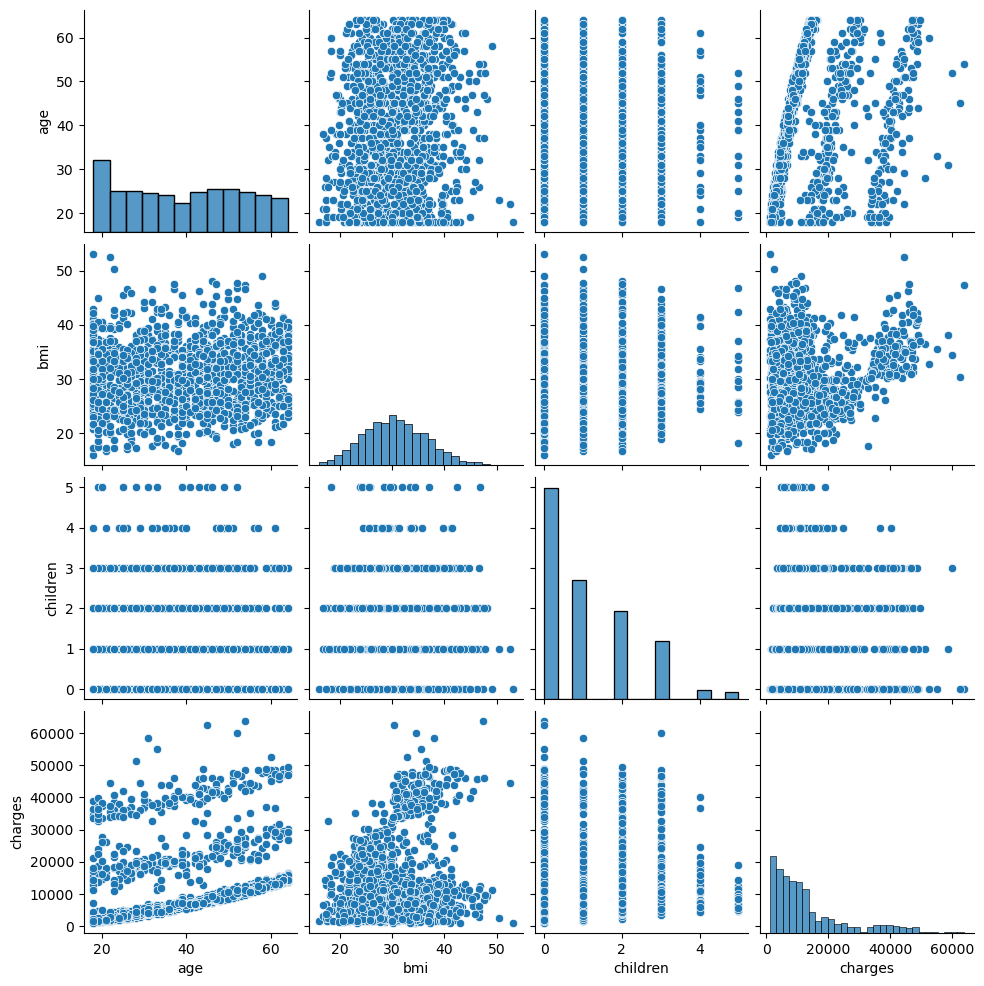

In [18]:
sns.pairplot(hm)

## Correlations 

In [19]:
corr_matrix = (hm.corr())
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


## Heat Maps

Text(0.5, 1.0, 'Correlation Matrix')

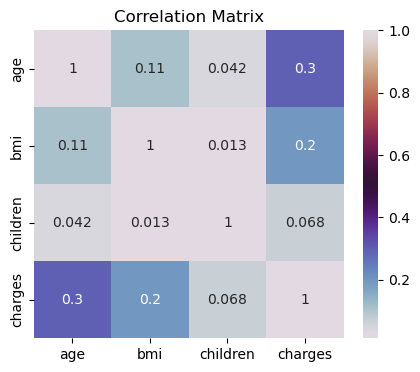

In [21]:
plt.figure(figsize=(5, 4))

sns.heatmap(corr_matrix, cmap='twilight', annot=True)
plt.title('Correlation Matrix')

## Creating the training and testing data

In [22]:
trn = df.iloc[0:1000, ]
tst = df.iloc[1000:1338, ]

In [23]:
trn.to_csv('trn.csv')
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [24]:
tst.to_csv('tst.csv')
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 1000 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       338 non-null    int64  
 1   sex       338 non-null    object 
 2   bmi       338 non-null    float64
 3   children  338 non-null    int64  
 4   smoker    338 non-null    object 
 5   region    338 non-null    object 
 6   charges   338 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 18.6+ KB


In [37]:
model1 = smf.ols(formula='charges ~ age + sex + bmi + children + smoker + region', data=trn).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     385.7
Date:                Fri, 06 Feb 2026   Prob (F-statistic):          4.13e-298
Time:                        08:43:57   Log-Likelihood:                -10103.
No. Observations:                1000   AIC:                         2.022e+04
Df Residuals:                     991   BIC:                         2.027e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.208e+04   1

## Prediction on test data

In [30]:
x_tst = tst.loc[:, tst.columns != 'charges'] # only predictors
y_tst = tst.loc[:, tst.columns == 'charges'] # only TV

In [32]:
x_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 1000 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       338 non-null    int64  
 1   sex       338 non-null    object 
 2   bmi       338 non-null    float64
 3   children  338 non-null    int64  
 4   smoker    338 non-null    object 
 5   region    338 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.0+ KB


In [33]:
y_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 1000 to 1337
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  338 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [38]:
pred1 = model1.predict(x_tst)
pred1.head(10)

1000    27583.412723
1001    27654.651245
1002     1476.903015
1003     9110.758242
1004     6981.434889
1005     6457.577475
1006     5793.641184
1007    34262.065060
1008     3547.756381
1009    10944.687636
dtype: float64

In [40]:
# Finding residuals
resd1 = y_tst['charges'] - pred1
resd1.head(10)

1000   -10221.646623
1001     6818.189755
1002      496.046985
1003    12121.424018
1004     1646.106211
1005    -2024.189775
1006    -1355.377784
1007    -9346.844210
1008    19693.718149
1009     -986.966036
dtype: float64

## Plot of Actual vs Predicted

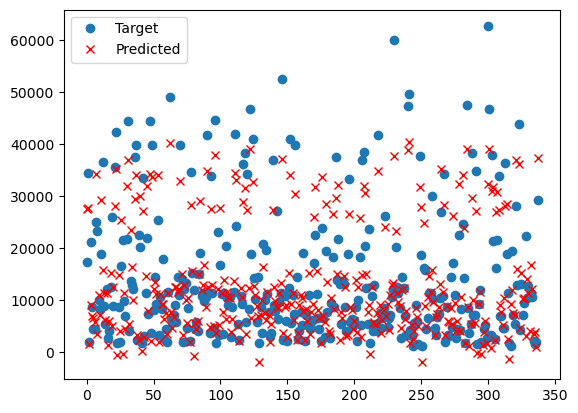

In [41]:
obsno = np.arange(0, 338, 1)

fig, ax = plt.subplots()

ax.plot(obsno, y_tst['charges'], 'o', label='Target')
ax.plot(obsno, pred1, 'x', color='red', label='Predicted')
ax.legend(loc='best')
plt.show()

In [42]:
# RMSE

se1 = resd1.pow(2) # square the errors
sse1 = se1.sum() # sum the squared terms
msse1 = sse1/len(se1) # sum of squared terms/ no. of observations or length

import math
rmse1 = math.sqrt(msse1)
print(round(rmse1, 2))

6442.86


## Model 2 
### Now we will remove sex and merge northwest with northeast in the trn dataset only

In [43]:
trn1 = trn.drop('sex', axis=1)
trn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   bmi       1000 non-null   float64
 2   children  1000 non-null   int64  
 3   smoker    1000 non-null   object 
 4   region    1000 non-null   object 
 5   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB


In [44]:
trn1.head(10)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520
5,31,25.740,0,no,southeast,3756.62160
6,46,33.440,1,no,southeast,8240.58960
7,37,27.740,3,no,northwest,7281.50560
8,37,29.830,2,no,northeast,6406.41070
9,60,25.840,0,no,northwest,28923.13692


In [45]:
trn1['region'] = trn1['region'].replace('northwest', 'northeast')
trn1.head(10)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northeast,21984.47061
4,32,28.880,0,no,northeast,3866.85520
5,31,25.740,0,no,southeast,3756.62160
6,46,33.440,1,no,southeast,8240.58960
7,37,27.740,3,no,northeast,7281.50560
8,37,29.830,2,no,northeast,6406.41070
9,60,25.840,0,no,northeast,28923.13692


In [46]:
trn1_regioncounts = trn1['region'].value_counts()
print(trn1_regioncounts)

region
northeast    478
southeast    278
southwest    244
Name: count, dtype: int64


## Model 2

In [49]:
model2 = smf.ols(formula = 'charges ~ age + bmi + children + smoker + region', data = trn1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     514.4
Date:                Fri, 06 Feb 2026   Prob (F-statistic):          1.50e-300
Time:                        08:55:33   Log-Likelihood:                -10103.
No. Observations:                1000   AIC:                         2.022e+04
Df Residuals:                     993   BIC:                         2.026e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.246e+04   1

In [50]:
trn1['region'] = trn1['region'].replace('southeast', 'south')
trn1['region'] = trn1['region'].replace('southwest', 'south')
trn1.head(10)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,south,16884.92400
1,18,33.770,1,no,south,1725.55230
2,28,33.000,3,no,south,4449.46200
3,33,22.705,0,no,northeast,21984.47061
4,32,28.880,0,no,northeast,3866.85520
5,31,25.740,0,no,south,3756.62160
6,46,33.440,1,no,south,8240.58960
7,37,27.740,3,no,northeast,7281.50560
8,37,29.830,2,no,northeast,6406.41070
9,60,25.840,0,no,northeast,28923.13692


In [51]:
trn1['region'] = trn1['region'].replace('northeast', 'north')
trn1.head(10)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,south,16884.92400
1,18,33.770,1,no,south,1725.55230
2,28,33.000,3,no,south,4449.46200
3,33,22.705,0,no,north,21984.47061
4,32,28.880,0,no,north,3866.85520
5,31,25.740,0,no,south,3756.62160
6,46,33.440,1,no,south,8240.58960
7,37,27.740,3,no,north,7281.50560
8,37,29.830,2,no,north,6406.41070
9,60,25.840,0,no,north,28923.13692


In [53]:
model3 = smf.ols(formula = 'charges ~ age + bmi + children + smoker + region', data=trn1).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     617.9
Date:                Fri, 06 Feb 2026   Prob (F-statistic):          5.76e-302
Time:                        09:02:35   Log-Likelihood:                -10103.
No. Observations:                1000   AIC:                         2.022e+04
Df Residuals:                     994   BIC:                         2.025e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.245e+04   1074.238    -